# Анализ маркетинговой стратегии развлекательного приложения Procrastinate Pro+
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

<b>Задачи исследования:</b>
<p>1. Изучить, откуда приходят пользователи и какими устройствами они пользуются;
<p>2. Выяснить, сколько стоит привлечение пользователей из различных рекламных каналов;
<p>3. Подсчитать, сколько денег приносит каждый клиент;
<p>4. Выявить ситуации, когда расходы на привлечение клиента окупаются;
<p>5. Изучить, какие факторы мешают привлечению клиентов.

<b>Ход исследования:</b>
<p>Данные о посещениях (visits) я получу из файла 'visits_info_short.csv', данные о заказах (orders) - из файла 'orders_info_short.csv', о расходах на рекламу (costs) - из файла 'costs_info_short.csv'. О качестве данных ничего не известно. Поэтому перед тем, как приступить к задачам исследования, необходимо провести обзор данных.
<p>Я проверю данные на наличие ошибок и их влияние на результат исследования. Далее, на этапе предобработки, я исправлю ошибки в данных там, где это возможно и где это не приведёт к искажению результата. Затем создам необходимые столбцы и приступлю к проведению исследовательского анализа, а также изучению маркетинговых показателей.
<p><b>Таким образом, исследование будет состоять из следующих этапов:</b>
        <p>- Обзор данных
        <p>- Предобработка данных
        <p>- Написание функций для расчёта и анализа LTV, ROI, удержания и конверсии
        <p>- Проведение анализа для пользователей различных когорт
        <p>- Проведение анализа расходов на маркетинг
        <p>- Оценка окупаемости рекламы
        <p>- Общий вывод

<b>Столбцы датасета:</b>
- с информацией о посещениях сайта (visits):
<p></p>
<p>User Id — уникальный идентификатор пользователя
<p>Region — страна пользователя
<p>Device — тип устройства пользователя
<p>Channel — идентификатор источника перехода
<p>Session Start — дата и время начала сессии
<p>Session End — дата и время окончания сессии
    <p></p>
- с информацией о заказах (orders):
<p></p>
<p>User Id — уникальный идентификатор пользователя
<p>Event Dt — дата и время покупки
<p>Revenue — сумма заказа
    <p></p>
- с информацией о расходах на рекламу (costs):
<p></p>
<p>dt — дата проведения рекламной кампании
<p>Channel — идентификатор рекламного источника
<p>costs — расходы на эту кампанию

### Изучение исходных данных

#### Загружаем библиотеки

In [1]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime, timedelta

#### Открываем файлы

In [2]:
try:
    visits = pd.read_csv('C:/Users/Даша/Desktop/Бизнес-показатели/Проект/visits_info_short.csv')
    orders = pd.read_csv('C:/Users/Даша/Desktop/Бизнес-показатели/Проект/orders_info_short.csv')
    costs = pd.read_csv('C:/Users/Даша/Desktop/Бизнес-показатели/Проект/costs_info_short.csv')
except:
    visits = pd.read_csv('*/visits_info_short.csv')
    orders = pd.read_csv('*/orders_info_short.csv')
    costs = pd.read_csv('*/costs_info_short.csv')

#### Выводим первые 10 строк таблиц, изучаем данные

In [3]:
display('visits',visits.head(10))
print()
display('orders',orders.head(10))
print()
display('costs',costs.head(10))

'visits'

User Id         Region   Device         Channel        Session Start  \
0  981449118918  United States   iPhone         organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone         organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac         organic  2019-05-01 14:09:25   
3  326433527971  United States  Android          TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac         organic  2019-05-01 03:33:35   
5   90242400005  United States   iPhone  RocketSuperAds  2019-05-01 07:14:52   
6   43958116050  United States  Android         organic  2019-05-01 09:03:21   
7  185365244969  United States   iPhone         organic  2019-05-01 09:37:03   
8  446013509831  United States   iPhone  RocketSuperAds  2019-05-01 10:26:00   
9  100970711362  United States      Mac          TipTop  2019-05-01 04:39:53   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
5  2019-05-01 08:19:56  
6  2019-05-01 10:08:39  
7  2019-05-01 10:00:43  
8  2019-05-01 10:59:17  
9  2019-05-01 04:57:05

'orders'

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
5  129100331057  2019-05-01 01:56:28     4.99
6  626807144131  2019-05-01 02:39:21     4.99
7  914062168985  2019-05-01 02:02:18     4.99
8  769669137453  2019-05-01 03:39:47     4.99
9  434198630691  2019-05-01 18:16:50     5.99

'costs'

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1
5  2019-05-06  FaceBoom  118.8
6  2019-05-07  FaceBoom  101.2
7  2019-05-08  FaceBoom  100.1
8  2019-05-09  FaceBoom   93.5
9  2019-05-10  FaceBoom  104.5

#### Используем метод 'info' для более глубокого понимания полученных данных

In [4]:
display('visits')
visits.info()
print()
display('orders')
orders.info()
print()
display('costs')
costs.info()

'visits'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB



'orders'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB



'costs'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


#### Редактируем названия столбцов
<p>Переводим все названия столбцов в нижний регистр

In [5]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

Заменяем все пробелы в названиях столбцов нижними подчеркиваниями:

In [6]:
visits.columns = visits.columns.str.replace(' ','_')
orders.columns = orders.columns.str.replace(' ','_')
costs.columns = costs.columns.str.replace(' ','_')

Проверяем

In [7]:
display('visits',visits.columns)
print()
display('orders',orders.columns)
print()
display('costs',costs.columns)

'visits'

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

'orders'

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

'costs'

Index(['dt', 'channel', 'costs'], dtype='object')

#### Строим общую гистограмму для числовых столбцов таблиц c информацией о заказах и расходах на рекламу

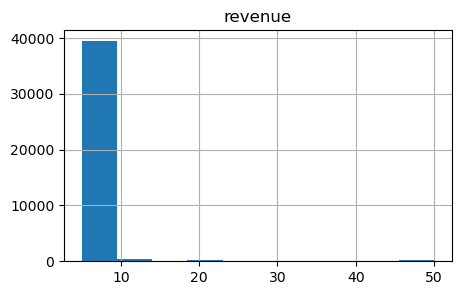

In [8]:
orders.hist(column='revenue',figsize=(5, 3));
costs.hist(figsize=(5, 3));

Как видно из полученных гистограмм, и выручка, и затраты имеют преимущественно околонулевые значения. Соответственно, можно сделать вывод, что либо в данных очень много выбросов, либо большинство единичных покупок и затрат были совершены на небольшую сумму.

### Предобработка данных

#### Проверяем, в каких столбцах есть пропуски

In [9]:
display('visits',visits.isna().sum())
print()
display('orders',orders.isna().sum())
print()
display('costs',costs.isna().sum())

'visits'

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

'orders'

user_id     0
event_dt    0
revenue     0
dtype: int64

'costs'

dt         0
channel    0
costs      0
dtype: int64

Пропусков нет

#### Рассмотрим типы данных в каждом столбце

In [10]:
display('visits',visits.dtypes)
print()
display('orders',orders.dtypes)
print()
display('costs',costs.dtypes)

'visits'

user_id           int64
region           object
device           object
channel          object
session_start    object
session_end      object
dtype: object

'orders'

user_id       int64
event_dt     object
revenue     float64
dtype: object

'costs'

dt          object
channel     object
costs      float64
dtype: object

##### Необходимо изменить тип данных в столбцах:
<p><b>- Дата и время начала сессии (session_start)</b> датасета с <b>посещениями (visits)</b>, данные необходимо перевести к типу datetime для возможности дальнейших вычислений,</p>
<p><b>- Дата и время окончания  сессии (session_end)</b> датасета с <b>посещениями (visits)</b>, данные необходимо перевести к типу datetime для возможности дальнейших вычислений,</p>
<p><b>- Дата и время покупки (event_dt)</b> датасета с <b>заказами (orders)</b>, данные необходимо перевести к типу datetime для возможности дальнейших вычислений,</p>
<p><b>- Дата проведения рекламной кампании (dt)</b> датасета с <b>затратами (costs)</b>, данные необходимо перевести к типу datetime для возможности дальнейших вычислений.</p>

##### Меняем тип данных в столбце Дата и время начала сессии (session_start)

In [11]:
visits['session_start'] = pd.to_datetime(visits['session_start'], format='%Y-%m-%d %H:%M:%S')
visits['session_start']

0        2019-05-01 02:36:01
1        2019-05-01 04:46:31
2        2019-05-01 14:09:25
3        2019-05-01 00:29:59
4        2019-05-01 03:33:35
                 ...        
309896   2019-10-31 13:28:12
309897   2019-10-31 22:14:52
309898   2019-10-31 01:40:48
309899   2019-10-31 07:37:34
309900   2019-10-31 14:17:43
Name: session_start, Length: 309901, dtype: datetime64[ns]

##### Меняем тип данных в столбце Дата и время окончания сессии (session_end)

In [12]:
visits['session_end'] = pd.to_datetime(visits['session_end'], format='%Y-%m-%d %H:%M:%S')
visits['session_end']

0        2019-05-01 02:45:01
1        2019-05-01 04:47:35
2        2019-05-01 15:32:08
3        2019-05-01 00:54:25
4        2019-05-01 03:57:40
                 ...        
309896   2019-10-31 14:39:29
309897   2019-10-31 22:39:36
309898   2019-10-31 01:41:31
309899   2019-10-31 07:37:55
309900   2019-10-31 15:17:04
Name: session_end, Length: 309901, dtype: datetime64[ns]

##### Меняем тип данных в столбце Дата и время покупки (event_dt)

In [13]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'], format='%Y-%m-%d %H:%M:%S')
orders['event_dt']

0       2019-05-01 23:09:52
1       2019-05-01 12:24:04
2       2019-05-01 11:34:04
3       2019-05-01 15:34:40
4       2019-05-01 13:59:51
                ...        
40207   2019-10-31 16:19:07
40208   2019-10-31 01:17:17
40209   2019-10-31 06:17:29
40210   2019-10-31 22:46:19
40211   2019-10-31 13:29:06
Name: event_dt, Length: 40212, dtype: datetime64[ns]

##### Меняем тип данных в столбце Дата проведения рекламной кампании (dt)

In [14]:
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d').dt.date
costs['dt']

0       2019-05-01
1       2019-05-02
2       2019-05-03
3       2019-05-04
4       2019-05-05
           ...    
1795    2019-10-23
1796    2019-10-24
1797    2019-10-25
1798    2019-10-26
1799    2019-10-27
Name: dt, Length: 1800, dtype: object

#### Устранение дубликатов

In [15]:
display('visits',visits.duplicated().sum())
print()
display('orders',orders.duplicated().sum())
print()
display('costs',costs.duplicated().sum())

'visits'

0

'orders'

0

'costs'

0

Явных дубликатов в датафреймах нет.

##### Устраняем неявные дубликаты

<b>Неявные дубликаты могут присутствовать в столбцах:</b>
<p><b>- Страна пользователя (region)</b> датасета с посещениями (visits) - названия тран могут быть написаны в разном регистре или содержать опечатки;
<p><b>- Тип устройства пользователя (device)</b> датасета с посещениями (visits) - названия типов устройств могут быть написаны в разном регистре или содержать опечатки;
<p><b>- Идентификатор источника перехода (channel)</b> датасета с посещениями (visits) - названия источников перехода могут быть написаны в разном регистре или содержать опечатки;
<p><b>- Идентификатор рекламного источника (channel)</b> датасета с посещениями (costs) - названия рекламных источников могут быть написаны в разном регистре или содержать опечатки;

##### Устранение неявных дубликатов в столбце Страна пользователя (region)
Изучим уникальные значения в данном столбце и их количество

In [16]:
display(visits[visits['region'].duplicated() == False]['region'].count())
display(visits['region'].unique())

4

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

Дубликатов нет

##### Устранение неявных дубликатов в столбце Тип устройства пользователя (device)
Изучим уникальные значения в данном столбце и их количество

In [17]:
display(visits[visits['device'].duplicated() == False]['device'].count())
display(visits['device'].unique())

4

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

Дубликатов нет

##### Устранение неявных дубликатов в столбце Идентификатор источника перехода (channel(visits))
Изучим уникальные значения в данном столбце и их количество

In [18]:
display(visits[visits['channel'].duplicated() == False]['channel'].count())
display(visits['channel'].unique())

11

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

Дубликатов нет

##### Устранение неявных дубликатов в столбце Идентификатор рекламного источника (channel(costs))
Изучим уникальные значения в данном столбце и их количество

In [19]:
display(costs[costs['channel'].duplicated() == False]['channel'].count())
display(costs['channel'].unique())

10

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Дубликатов нет

#### Вывод по разделу
Полученные данные являются достаточно качественными, пропуски и дубликаты отсутствуют. Для дальнейшего использования данных необходимо было только привести столбцы датасетов, содержащие информацию о дате и времени, к формату datetime.

<p>  </p>
<p>  </p>
<p>  </p>
<p>  </p>
<p>  </p>
<p>  </p>
<p>  </p>

### Исследовательский анализ данных

#### Функции для расчёта и анализа LTV, ROI, удержания и конверсии
Зададим функции для вычисления значений метрик, а также функции для построения графиков.

##### Функция для создания профилей пользователей

In [20]:
def get_profiles(sessions, orders,events, ad_costs, event_names=[]):
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )
    
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

##### Функция для подсчёта Retention Rate

In [21]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time

##### Функция для подсчёта конверсии

In [22]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: 
        dimensions = []

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

##### Функция для подсчёта LTV  и ROI

In [23]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )

        result = result.fillna(0).cumsum(axis=1)

        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes

        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi


    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:
        dimensions = []

    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

##### Функция для сглаживания данных

In [24]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

##### Функция для построения графика Retention Rate

In [25]:
def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))

    retention = retention.drop(columns=['cohort_size', 0])
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    ax3 = plt.subplot(2, 2, 3)
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

##### Функция для построения графика конверсии

In [26]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

##### Функция для визуализации LTV и ROI

In [27]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    cac_history = roi_history[['cac']]

    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Изучим следующие параметры:
<p><b>- </b>Профили пользователей</p>
<p><b>- </b>Страны пользователей</p>
<p><b>- </b>Устройства пользователей</p>
<p><b>- </b>Рекламные источники, каналы привлечения пользователей</p>

##### Составим профили пользователей

In [28]:
events = None
profiles = get_profiles(visits, orders, events, costs)
display(profiles.head(10))

user_id            first_ts       channel   device         region  \
0    599326 2019-05-07 20:58:57      FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07      FaceBoom   iPhone  United States   
2   6085896 2019-10-01 09:58:33       organic   iPhone         France   
3  22593348 2019-08-22 21:35:48    AdNonSense       PC        Germany   
4  31989216 2019-10-02 00:07:44       YRabbit   iPhone  United States   
5  34186288 2019-05-09 17:29:23       organic  Android  United States   
6  38448301 2019-08-16 11:56:00       organic  Android  United States   
7  46006712 2019-06-30 03:46:29    AdNonSense  Android         France   
8  58263264 2019-05-11 19:18:43      FaceBoom   iPhone  United States   
9  59835779 2019-05-11 21:13:47  MediaTornado   iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  
5  2019-05-09 2019-05-01  False          0.000000  
6  2019-08-16 2019-08-01  False          0.000000  
7  2019-06-30 2019-06-01   True          1.008000  
8  2019-05-11 2019-05-01  False          1.128205  
9  2019-05-11 2019-05-01  False          0.250435

##### Установим момент и горизонт анализа данных.

In [29]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Определим минимальную и максимальную даты привлечения пользователей

In [30]:
min_date=profiles['dt'].min()
max_date=profiles['dt'].max()
days_num = (max_date - min_date).days
display(min_date,max_date,days_num)

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

179

##### Создадим функцию для формирования сводной таблицы и построения графиков

In [31]:
def sales_count (profile,sales_sort,color,title,xlabel,ylabel,x='user_id_1000'):
    sales=profile.groupby(sales_sort)[['user_id','payer']]\
                .agg({'user_id':'count','payer':'sum'}).reset_index()\
                .sort_values(by='user_id',ascending=False)
    sales['user_id_1000'] = sales['user_id']/1000
    sales['payer_share'] = sales['payer']/sales['user_id']*100
    ax = sb.barplot(x=x,
                y=sales_sort,
                color = color,
                data=sales,
                orient = 'h')
    ax.set_title(title)
    ax.set(xlabel=xlabel, ylabel=ylabel);
    return sales

##### Выясним, из каких стран пользователи приходят в приложение

In [32]:
sb.set(rc = {'figure.figsize':(6,3)})
countries_sales = sales_count(
    profiles,'region','green','Распределение количества пользователей по странам, тыс чел',\
    'Уникальных пользователей, тыс чел','Страна')

Как видно из получиненной гистограммы, большинство пользователей приходит из США, в то время как из остальных стран - более, чем в 5 раз меньше. Значит, приложение по каким-то причинам наиболее популярно именно в США, либо маркетинговая кампания в этой стране работает наилучшим образом. 

##### Определим, на какую страну приходится больше всего платящих пользователей

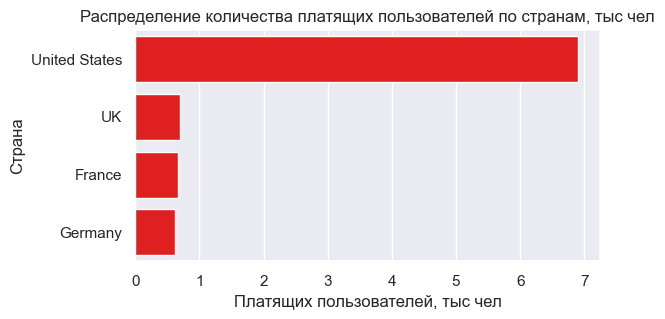

In [33]:
countries_sales = sales_count(
    profiles[profiles['payer'] == True],'region','red','Распределение количества платящих пользователей по странам, тыс чел',\
    'Платящих пользователей, тыс чел','Страна')

Посмотрев на полученный график, можно сделать вывод, что абсолютное большинство платящих пользователей также из США. Теперь посмотрим на пользователей, совершивших покупку, но уже в процентном соотношении к общему количеству пользователей.

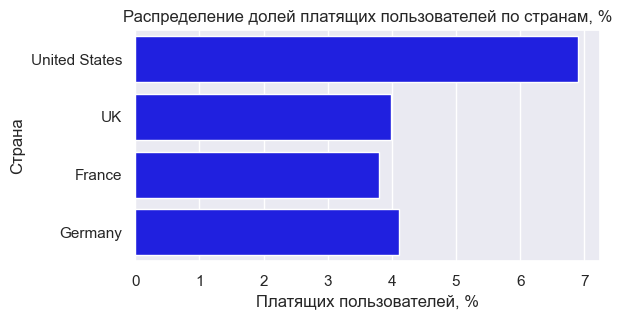

In [34]:
countries_sales = sales_count(
    profiles,'region','blue','Распределение долей платящих пользователей по странам, %',\
    'Платящих пользователей, %','Страна','payer_share')

Как видно из гистограммы, не только абсолютное большинство пользователей, совершивших покупку, из США, но и их доля в общем числе пользователей также наибольшая для данной страны: около 7% новых пользователей конвертируются в покупателей. Для других стран данный показатель составляет около 4%, что почти в 2 раза меньше.

Объединим полученные данные в одну таблицу.

In [35]:
countries_sales['payer_share'] = countries_sales['payer_share'].map("{:,.2f}%".format)
countries_sales=countries_sales.drop(columns='user_id_1000')
pd.DataFrame(round(countries_sales,1)).style.background_gradient('coolwarm')

##### Узнаем, какими устройствами пользуются клиенты

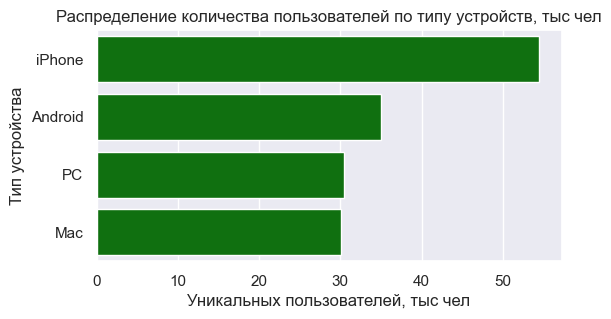

In [36]:
devices_sales = sales_count(
    profiles,'device','green','Распределение количества пользователей по типу устройств, тыс чел',\
    'Уникальных пользователей, тыс чел','Тип устройства')

Как видно из получиненной гистограммы, большинство пользователей совершают свои действия с устройств типа 'IPhone', в то время как с остальных устройств - примерно в 2 раза меньше. Значит, приложение по каким-то причинам наиболее популярно именно среди пользователей данного типа устройств, либо маркетинговая кампания работает наилучшим образом именно для владельцев 'IPhone'.

##### Определим, на какой тип устройств приходится больше всего платящих пользователей

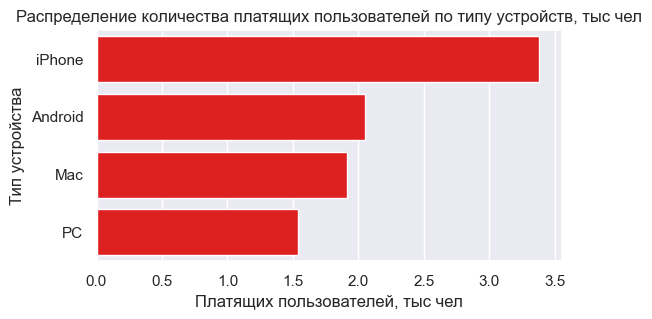

In [37]:
devices_sales = sales_count(
    profiles[profiles['payer'] == True],'device','red',\
    'Распределение количества платящих пользователей по типу устройств, тыс чел', 'Платящих пользователей, тыс чел',\
    'Тип устройства')

Также, как и с общим количеством пользователей, большинство платящих пользователей являются владельцами устройств типа 'IPhone'. Расмотрим также данный показатель в процентном соотношении к общему числу пользователей по типам устройств.

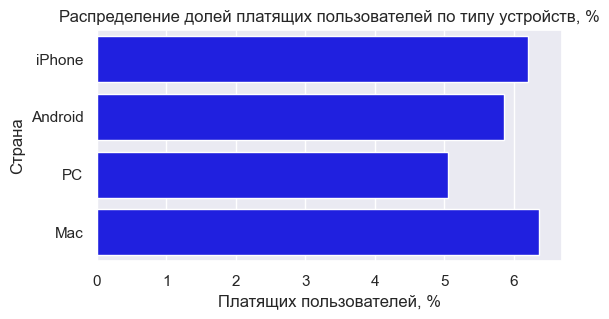

In [38]:
devices_sales = sales_count(
    profiles,'device','blue','Распределение долей платящих пользователей по типу устройств, %',\
    'Платящих пользователей, %','Страна','payer_share')

На основании полученного графика можно сделать вывод, что несмотря на значительно большее количество платящих пользователей-владельцев 'IPhone', процент пользователей, совершивших покупку, примерно одинаков для всех типов устройств и составляет примерно 5-6%.

Объединим полученные данные в одну таблицу.

In [39]:
devices_sales['payer_share'] = devices_sales['payer_share'].map("{:,.2f}%".format)
devices_sales=devices_sales.drop(columns='user_id_1000')
pd.DataFrame(round(devices_sales,1)).style.background_gradient('coolwarm')

##### Изучим рекламные источники привлечения

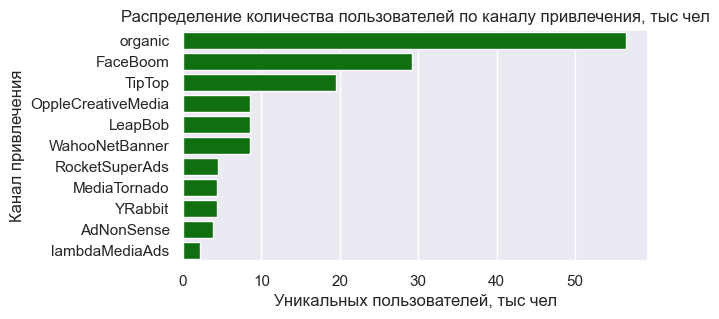

In [40]:
channels_sales = sales_count(
    profiles,'channel','green','Распределение количества пользователей по каналу привлечения, тыс чел',\
    'Уникальных пользователей, тыс чел','Канал привлечения')

Как видно из полученного графика, большинство пользователей пришли "естественным" путем (около 56-58 тыс.чел), т.е. не через рекламные объявления. Что касается рекламных каналов, то наибольшее количество пользователей было привлечено через 'FaceBoom'(около 30 тыс чел.),а также 'TipTop'(около 20 тыс чел.). Через каждый из других каналов было привлечено менее 10 тыс. пользователей.

##### Определим каналы, из которых пришло больше всего платящих пользователей

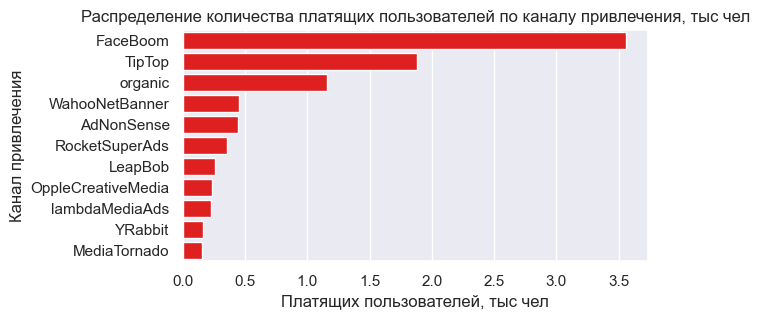

In [41]:
channels_sales = sales_count(
    profiles[profiles['payer'] == True],'channel','red',\
    'Распределение количества платящих пользователей по каналу привлечения, тыс чел', 'Платящих пользователей, тыс чел',\
    'Канал привлечения')

Как видно из полученного графика, большинство платящих пользователей также привлекаются через канал 'FaceBoom'(около 3,5 тыс чел.) и 'TipTop'(около 2 тыс чел.), через другие же каналы приходит примерно в 3-4 раза меньше платящих пользователей.
Расмотрим также данный показатель в процентном соотношении к общему числу пользователей по каналу привлечения.

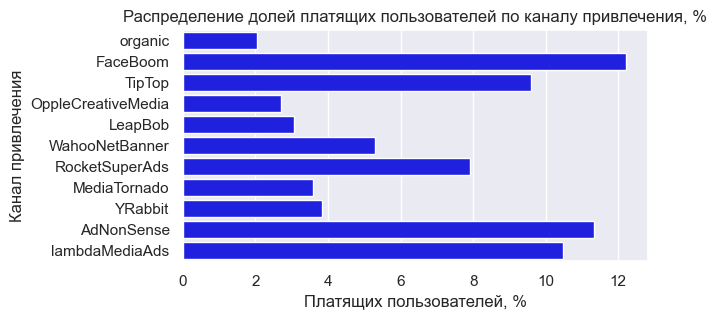

In [42]:
channels_sales = sales_count(
    profiles,'channel','blue','Распределение долей платящих пользователей по каналу привлечения, %',\
    'Платящих пользователей, %','Канал привлечения','payer_share')

Согласно полученному графику, наиболее эффективным со стороны доли платящих пользователей среди привлечённых оказался 'FaceBoom'(около 12%), а также 'AdNonSense'(около 11%), хотя другие каналы также не особо уступают в эффективности привлечения платящих пользователей, за исключением нескольких, для которых показатель эффективности примерно в 3 раза меньше, чем у ведущих каналов. Остальные каналы также не сильно отстают в своей эффективности.

Объединим полученные данные в одну таблицу.

In [43]:
channels_sales['payer_share'] = channels_sales['payer_share'].map("{:,.2f}%".format)
channels_sales=channels_sales.drop(columns='user_id_1000')
pd.DataFrame(round(channels_sales[channels_sales['payer_share'].isna() == False],1)).style.background_gradient('coolwarm')

In [44]:
# Код ревьюера

sales = profiles.groupby('channel')[['user_id', 'payer']]\
                .agg({'user_id': 'count', 'payer': 'sum'}).reset_index()\
                .sort_values(by='user_id', ascending=False)

sales['payer_share'] = sales['payer'] / sales['user_id']

sales = sales.style.format({'user_id': '{:.0f}', 'payer': '{:.0f}', 'payer_share': '{:.2%}'})

sales.background_gradient('coolwarm')

#### Вывод по разделу

На основании проведённого анализа можно сделать вывод, что:
- Данные о пользователях предоставлены в промежутке с 1 мая 2019г. по 27 октября 2019г. - всего за 179 дней; 
- Относительно спектра <b>стран</b>, из которых привлекаются пользователи:
 <p>- Большинство пользователей приходит из США (около 100 000 чел.), в то время как из остальных стран - более, чем в 5 раз меньше;
 <p>- Абсолютное большинство платящих пользователей также из США;</p>
 <p>- Доля платящих пользователей в общем числе также наибольшая для США: около 7% новых пользователей конвертируются в покупателей. Для других стран данный показатель составляет около 4%, что почти в 2 раза меньше.</p>
 <p></p>
- Относительно <b>устройств</b>, используемых привлечёнными пользователями:
 <p>- Большинство пользователей совершают свои действия с устройств типа 'IPhone'(около 100 000 чел.), в то время как с остальных устройств - примерно в 2 раза меньше;
 <p>- Абсолютное большинство платящих пользователей также являются владельцами устройств типа 'IPhone';
 <p>- Несмотря на значительно большее количество платящих пользователей-владельцев 'IPhone', процент пользователей, совершивших покупку, примерно одинаков для всех типов устройств и составляет примерно 5-6%.</p>
 <p></p>
- Относительно <b>каналов привлечения</b> пользователей:
 <p>- Большинство пользователей пришли "естественным" путем (около 56-58 тыс.чел), т.е. не через рекламные объявления. Что касается рекламных каналов, то наибольшее количество пользователей было привлечено через 'FaceBoom'(около 30 тыс чел.),а также 'TipTop'(около 20 тыс чел.). Через каждый из других каналов было привлечено менее 10 тыс. пользователей.;
 <p>- Абсолютное большинство платящих пользователей также привлекаются через канал 'FaceBoom'(около 3,5 тыс чел.) и 'TipTop'(около 2 тыс чел.), через другие же каналы приходит примерно в 3-4 раза меньше платящих пользователей;
 <p>- Наиболее эффективным со стороны доли платящих пользователей среди привлечённых оказался 'FaceBoom'(около 12%), а также 'AdNonSense'(около 11%), хотя другие каналы также не особо уступают в эффективности привлечения платящих пользователей, за исключением нескольких.
<p></p>
<p>Таким образом, в каждой категории выделяется определённый источник пользователей, более, чем в 5 раз превышающий по производительности другие источники. Однако распределение долей платящих пользователей по источникам различается: если для некоторых категорий наиболее производительный канал является и наиболее эффективным, то для других эффективнотсть конверсии пользователей в покупателей примерно одинакова.

### Маркетинг
Изучим маркетинговые показатели для предоставленного набора данных

#### Посчитаем общую сумму расходов на маркетинг

In [45]:
print('Сумма расходов на маркетинг: ',round(costs['costs'].sum(),1))

Сумма расходов на маркетинг:  105497.3


#### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник

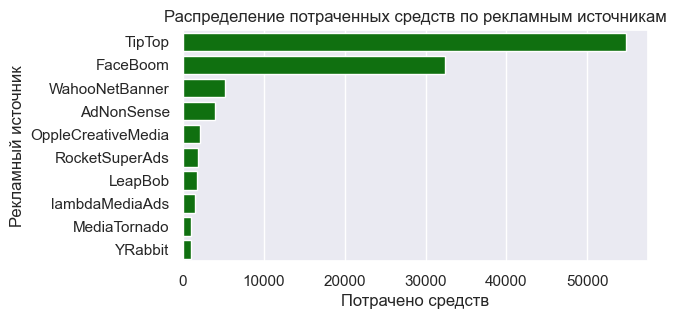

In [46]:
channels_costs = costs.groupby('channel')['costs']\
                .sum().reset_index()\
                .sort_values(by='costs',ascending=False)
ax = sb.barplot(x='costs',
            y='channel',
            color = 'green',
            data=channels_costs,
            orient = 'h')
ax.set_title('Распределение потраченных средств по рекламным источникам')
ax.set(xlabel='Потрачено средств', ylabel='Рекламный источник');

На основании полученной гистограммы можно сделать вывод, что наибольшее финансирование получают каналы 'TipTop' и 'FaceBoom', на них тратится около 55 000 и 32 000 соотвественно. На остальные же каналы приходится только по около 5 и менее тыс. усл.ед.

#### Построим визуализацию динамики изменения расходов во времени по каждому источнику

In [47]:
costs_dynamics = costs.groupby(['dt','channel'])\
                .agg({'costs':'sum'}).reset_index()\
                .sort_values(by='costs',ascending=False)

#Сформируем сводную таблицу расходов по датам на каждый из каналов
costs_dynamics = costs_dynamics.pivot_table(
    index='dt', columns='channel', values='costs', aggfunc='sum'
)
costs_dynamics['sum'] = costs_dynamics.sum(axis=1)
display(costs_dynamics.head(10))

channel     AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
dt                                                                            
2019-05-01       40.95     113.3     2.52          6.24                4.25   
2019-05-02       34.65      78.1     2.94          5.04                4.25   
2019-05-03       47.25      85.8     2.73          6.96                5.75   
2019-05-04       51.45     136.4     3.99          9.36                4.25   
2019-05-05       36.75     122.1     4.62         11.04                5.50   
2019-05-06       43.05     118.8     4.62          9.60                5.00   
2019-05-07       30.45     101.2     4.20          8.88                5.75   
2019-05-08       37.80     100.1     3.99          6.72                4.25   
2019-05-09       37.80      93.5     3.78          6.72                4.25   
2019-05-10       46.20     104.5     3.36          8.64                5.75   

channel     RocketSuperAds  TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  \
dt                                                                            
2019-05-01          21.060    80.0            10.8      8.1            17.6   
2019-05-02          16.965    55.0             7.2      9.9            16.8   
2019-05-03          16.380    64.0             8.4      9.0            16.8   
2019-05-04          17.550    70.0            10.8     15.6            17.6   
2019-05-05          27.495    78.0            12.0      9.6            12.8   
2019-05-06          21.645    78.0            19.2     10.5            14.4   
2019-05-07          18.720    77.0             8.4      9.3            16.0   
2019-05-08          18.135    57.0             7.8     12.6            11.2   
2019-05-09          18.720    46.0            11.4     11.1            10.4   
2019-05-10          22.230    74.0            14.4     10.5            20.0   

channel         sum  
dt                   
2019-05-01  304.820  
2019-05-02  230.845  
2019-05-03  263.070  
2019-05-04  337.000  
2019-05-05  319.905  
2019-05-06  324.815  
2019-05-07  279.900  
2019-05-08  259.595  
2019-05-09  243.670  
2019-05-10  309.580

##### Визуализация динамики изменения расходов  ПО НЕДЕЛЯМ

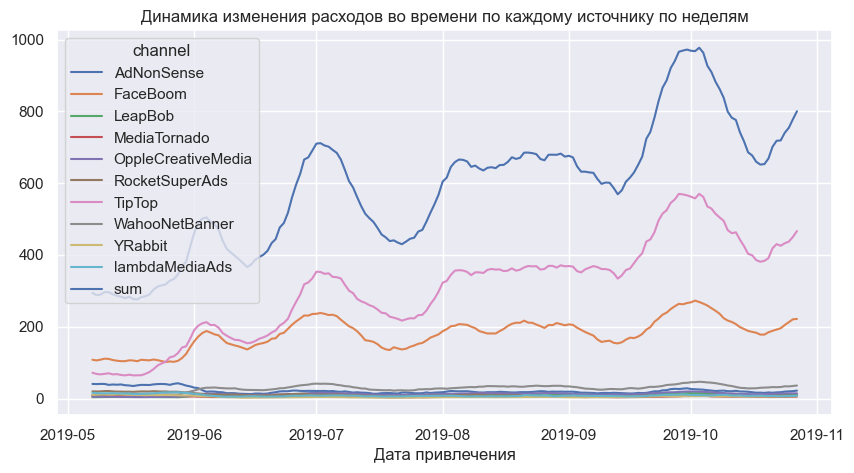

In [48]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df
sb.set(rc = {'figure.figsize':(10,5)})
window = 7
filter_data(costs_dynamics, window).plot(grid = True)
plt.title('Динамика изменения расходов во времени по каждому источнику по неделям'.format(window))
plt.xlabel('Дата привлечения')
plt.show() 

Как видно из полученного графика, объем финансирования менялся понедельно только для каналов с наибольшим количеством привлекаемых пользователей: 'TipTop' и 'FaceBoom'. Видны значительные увеличения потраченной суммы в июле и октябре, причем данные "скачки" происходили одновременно для двух каналов, соответственно, это, скорее всего, вызвано способностью компании к финансированию в связи со скачками прибыли в данные недели и месяцы. На остальные каналы тратились примерно одинаковые суммы в течение всего изучаемого периода.

##### Визуализация динамики изменения расходов  ПО МЕСЯЦАМ

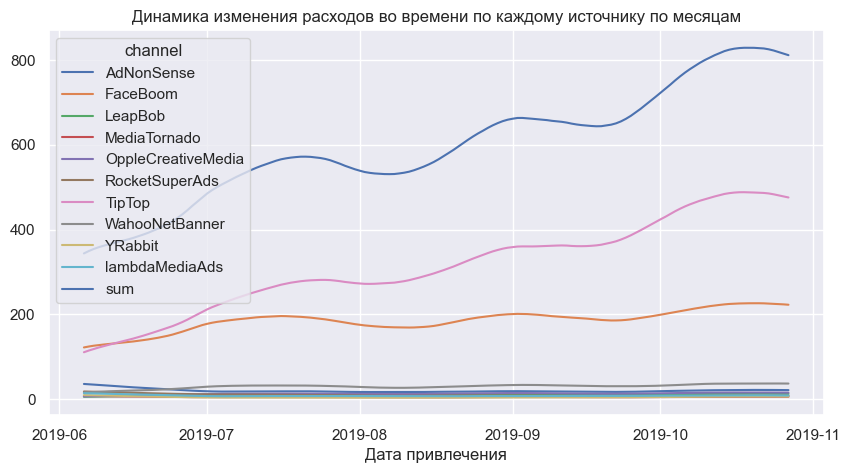

In [49]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

sb.set(rc = {'figure.figsize':(10,5)})
window = 31
filter_data(costs_dynamics, window).plot(grid = True)
plt.title('Динамика изменения расходов во времени по каждому источнику по месяцам'.format(window))
plt.xlabel('Дата привлечения')
plt.show() 

На основании полученного графика видно, что затраты на два основных рекламных канала: 'TipTop' и 'FaceBoom' растут в течение изучаемого периода времени, в то время как финансирование остальных каналов остаётся примерно на одном уровне.

#### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника

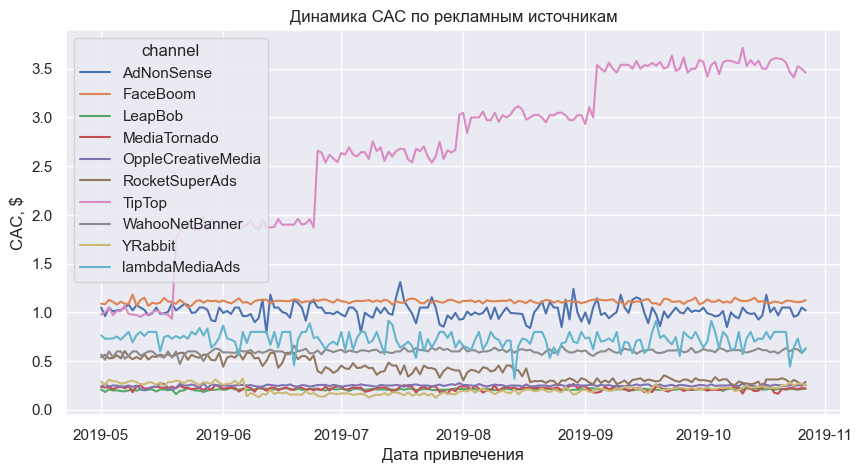

In [50]:
profiles[profiles['channel'] != 'organic'].pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по рекламным источникам')
plt.show()

На основании графика можно сделать вывод, что для большинства рекламных каналов стоимость привлечения пользователей остаётся практически неизменной, за исключением канала 'TipTop', для которого она постоянно повышается. Интересно, что именно на этот источник привлечения пользователей тратится наибольшее количество средств. Соответственно, эффективность данного канала в течение изучаемого периода постоянно снижается.

#### Вывод по разделу

На основании проведённого анализа можно сделать вывод, что:
-  Объем финансирования менялся понедельно только для каналов с наибольшим количеством привлекаемых пользователей: 'TipTop' и 'FaceBoom'. На остальные каналы тратились примерно одинаковые суммы в течение всего изучаемого периода.
- Затраты на два основных рекламных канала: 'TipTop' и 'FaceBoom' растут в течение изучаемого периода времени, в то время как финансирование остальных каналов остаётся примерно на одном уровне.
- Для большинства рекламных каналов стоимость привлечения пользователей остаётся практически неизменной, за исключением канала 'TipTop', для которого она постоянно повышается, эффективность данного канала в течение изучаемого периода постоянно снижается.
<p></p>
<p>Таким образом, можно выделить 2 основных рекламных канала, выделяющихся как по объёму финансирования, так и по стоимости привлечения пользователей. Остальные же каналы находятся почти на одном уровне по данным показателям.

### Оценка окупаемости рекламы
Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Будем считать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.
<p>Также, необходимо исключить органических пользователей, поскольку средства на них не расходуются.

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI

In [51]:
# считаем LTV и ROI
profiles_paid = profiles[profiles['channel'] != 'organic']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_paid, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:
- Реклама не окупается. ROI в конце двух недель приближается к 80%.
- CAC не стабилен. Значит, рекламный бюджет увеличивается, что также было выяснено ранее.
- LTV достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

#### Проверим конверсию пользователей и динамику её изменения

##### Конверсия пользователей

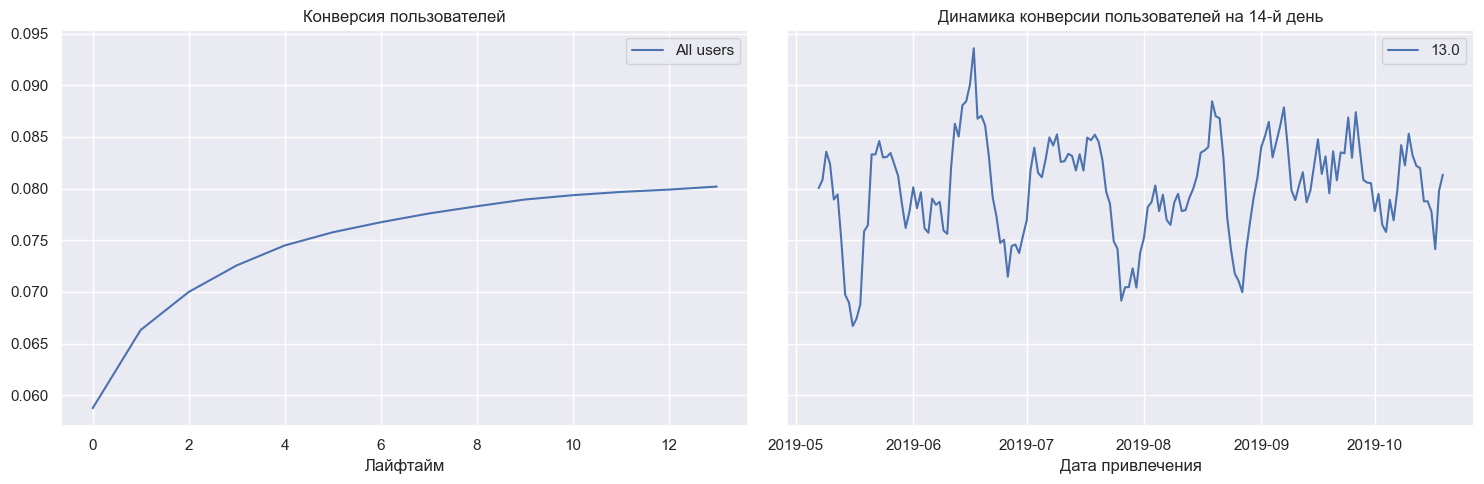

In [52]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_paid, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Как видно из полученных графиков, пользователи конвертируются хорошо, несмотря на периодические колебания. 

##### Удержание пользователей

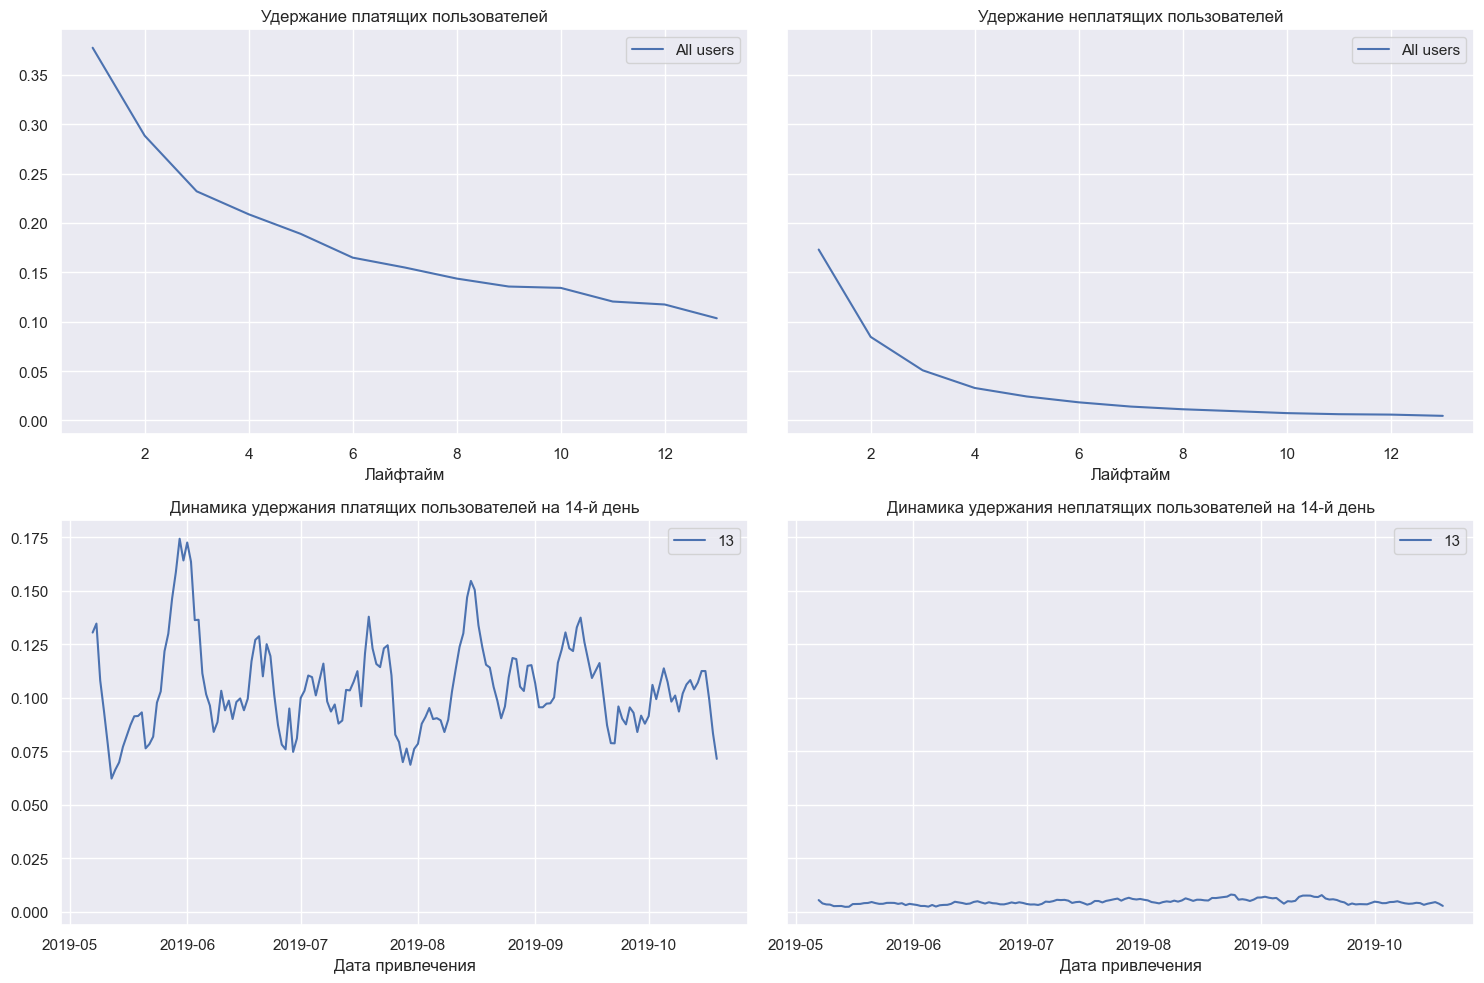

In [53]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_paid, visits[visits['channel'] != 'organic'], observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

На основании полученных графиков можно сделать вывод, что удержание как платящих, так и не платящих пользователей не особо хорошо и составляет всего примерно 10-15%, а также сильно снижается уже на 2-3 день.

#### Проанализируем окупаемость рекламы с разбивкой по устройствам

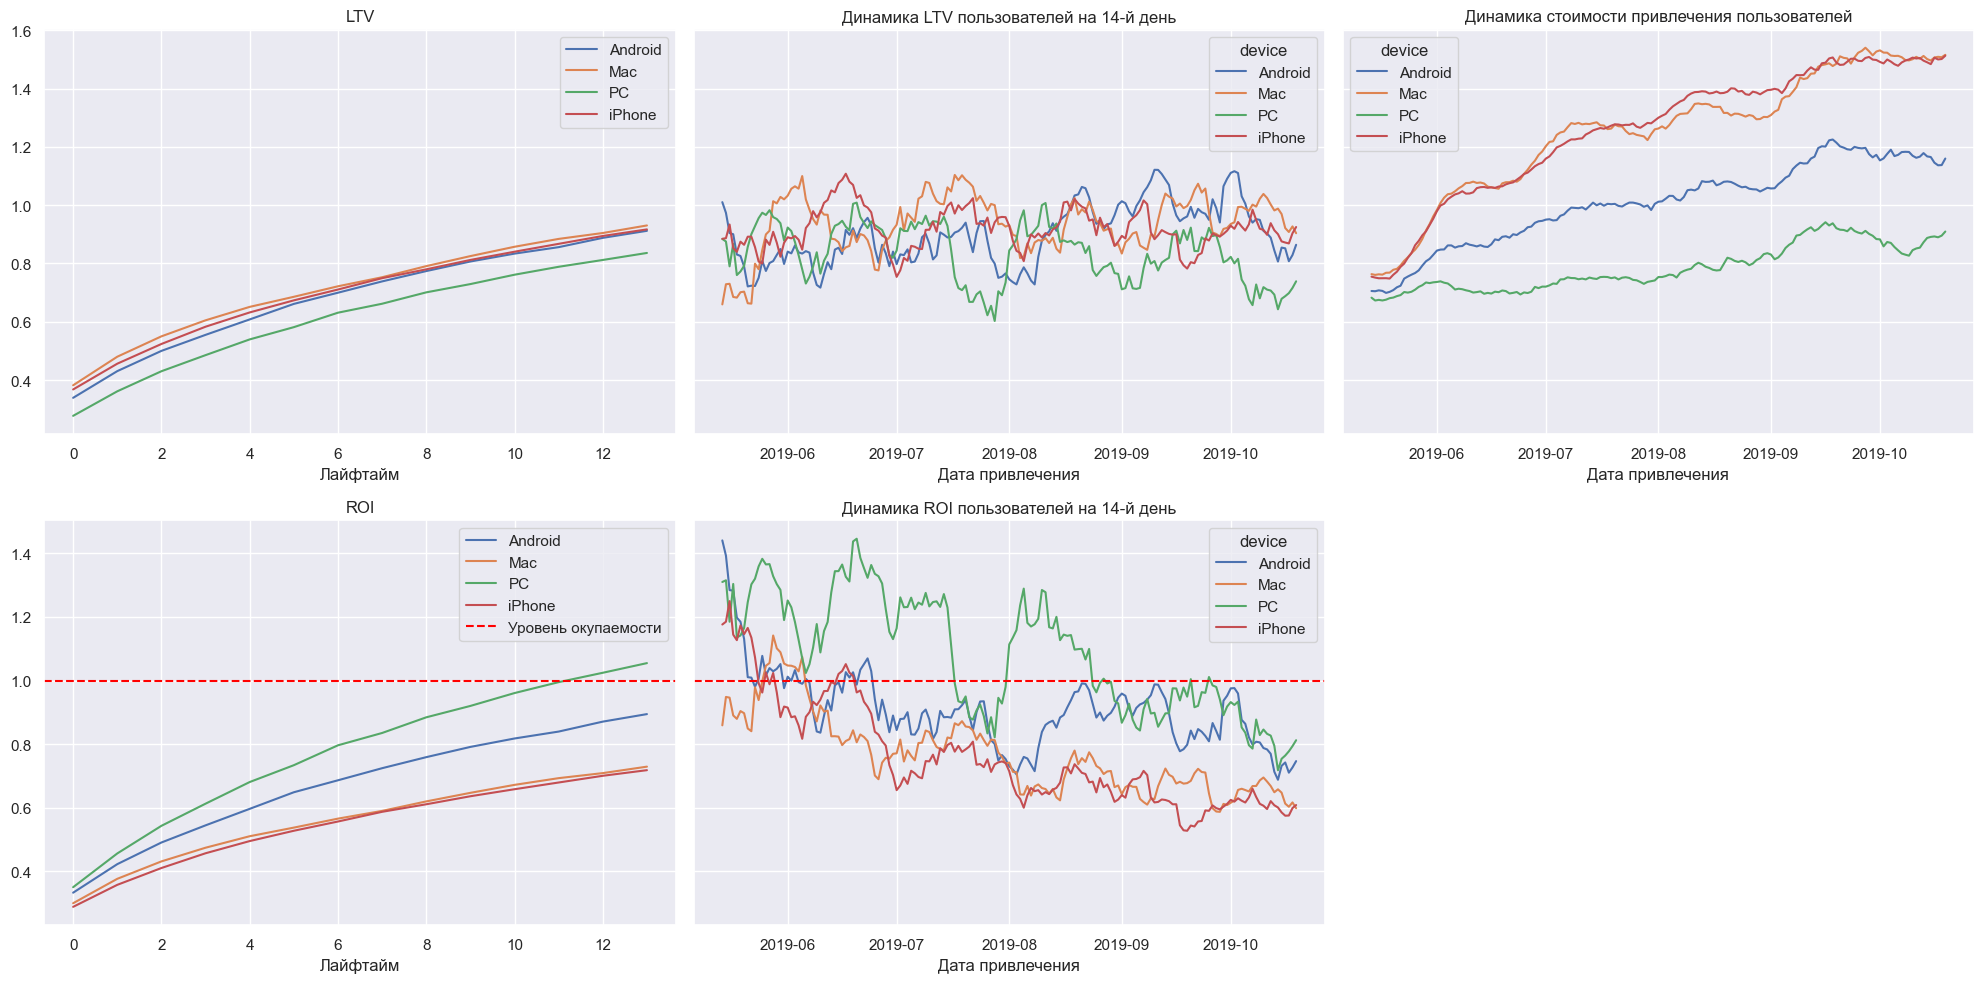

In [54]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_paid, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Как видно из полученных графиков, окупаются пользователи только 'PC', в то время как пользователи остальных утсройств не окупаются. При этом стоимость привлечения, наоборот, стабильно выше для пользователей 'IPhone' и 'Mac', а для 'PC' данный показатель принимает наименьшие значения.

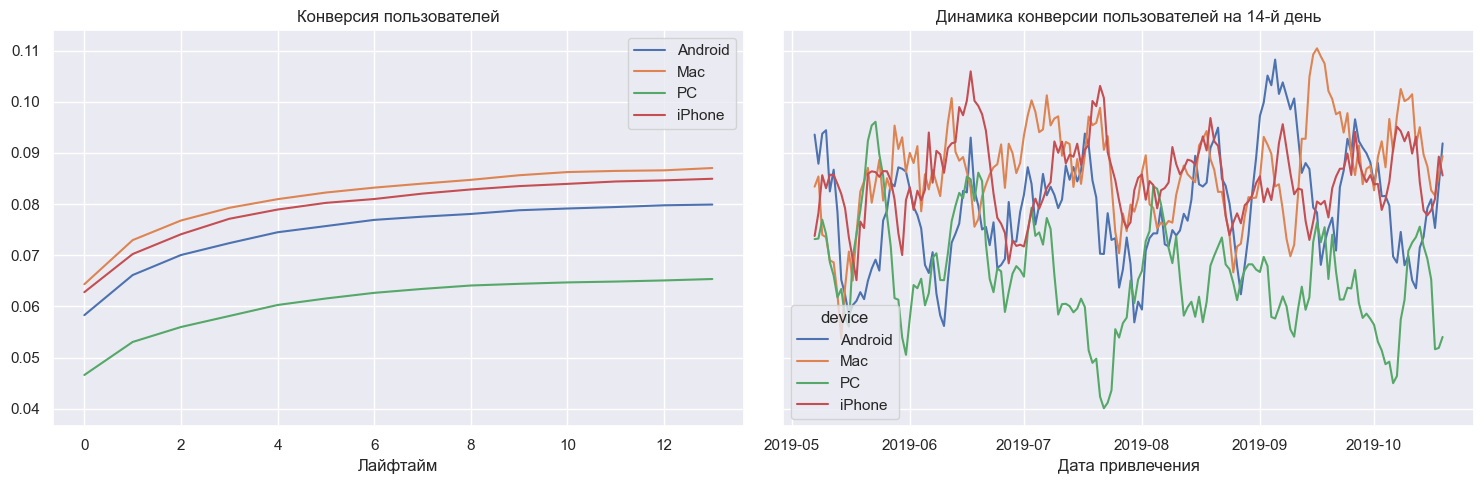

In [55]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_paid, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Как видно из графика, пользователи 'PC', несмотря на наибольшую окупаемость, конвертируются хуже, чем пользователи остальных типов устройств.

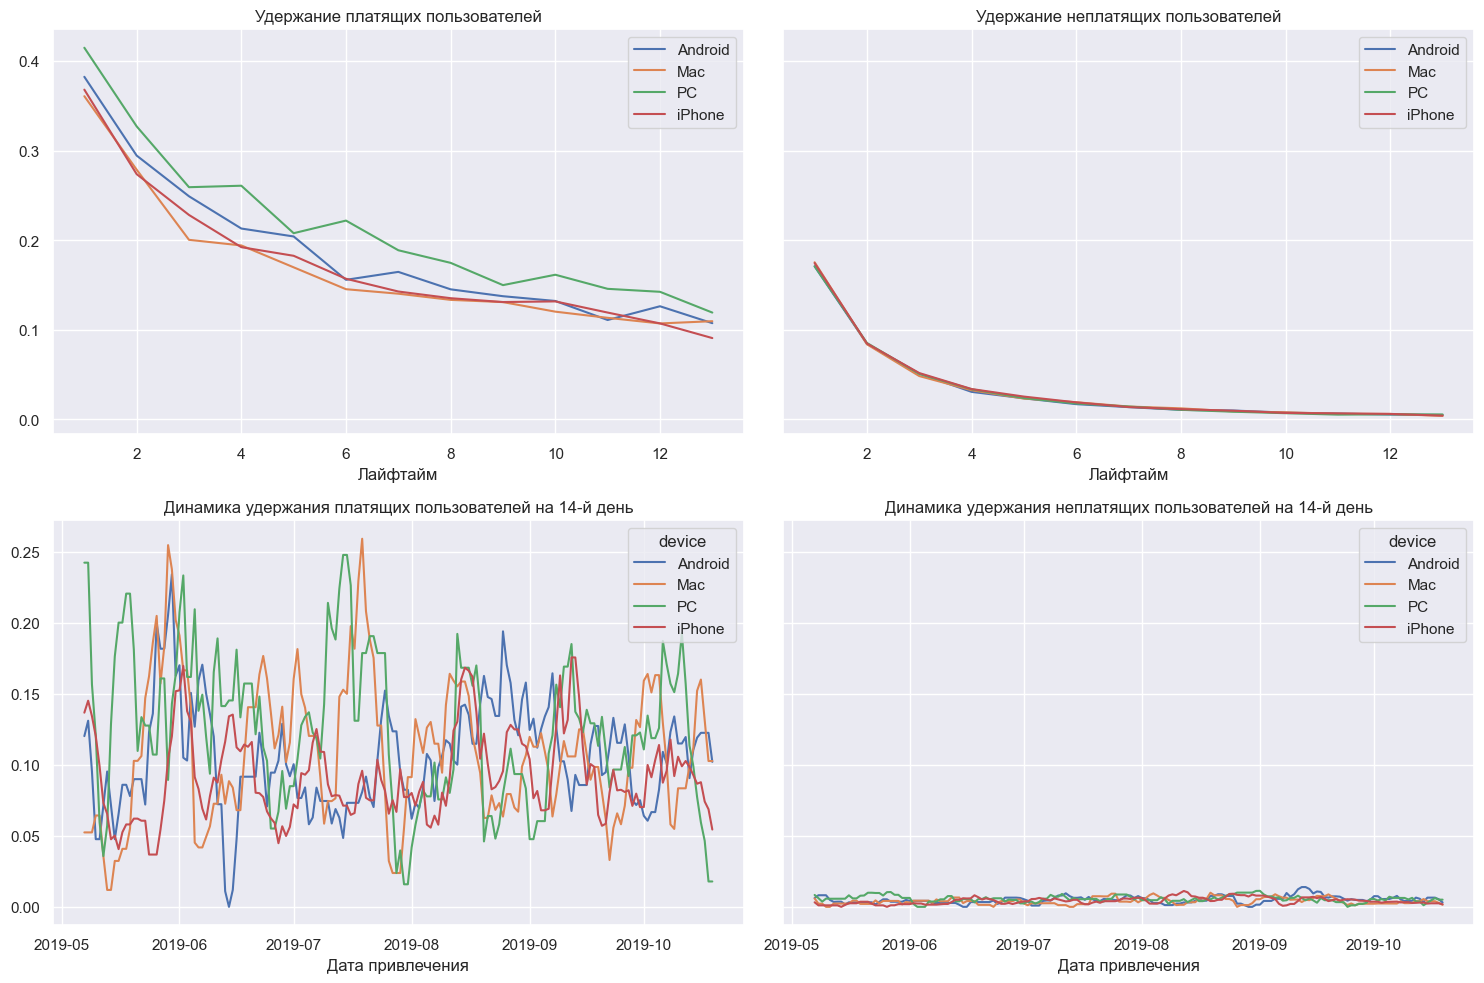

In [56]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_paid, visits[visits['channel'] != 'organic'], observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

А удержание для всех платформ находится примерно на одном уровне. Значит, окупаемость пользователей 'PC' обусловлена невысокой стоимостью привлечения пользователей, даже несмотря на низкий уровень конверсии.

#### Проанализируем окупаемость рекламы с разбивкой по странам

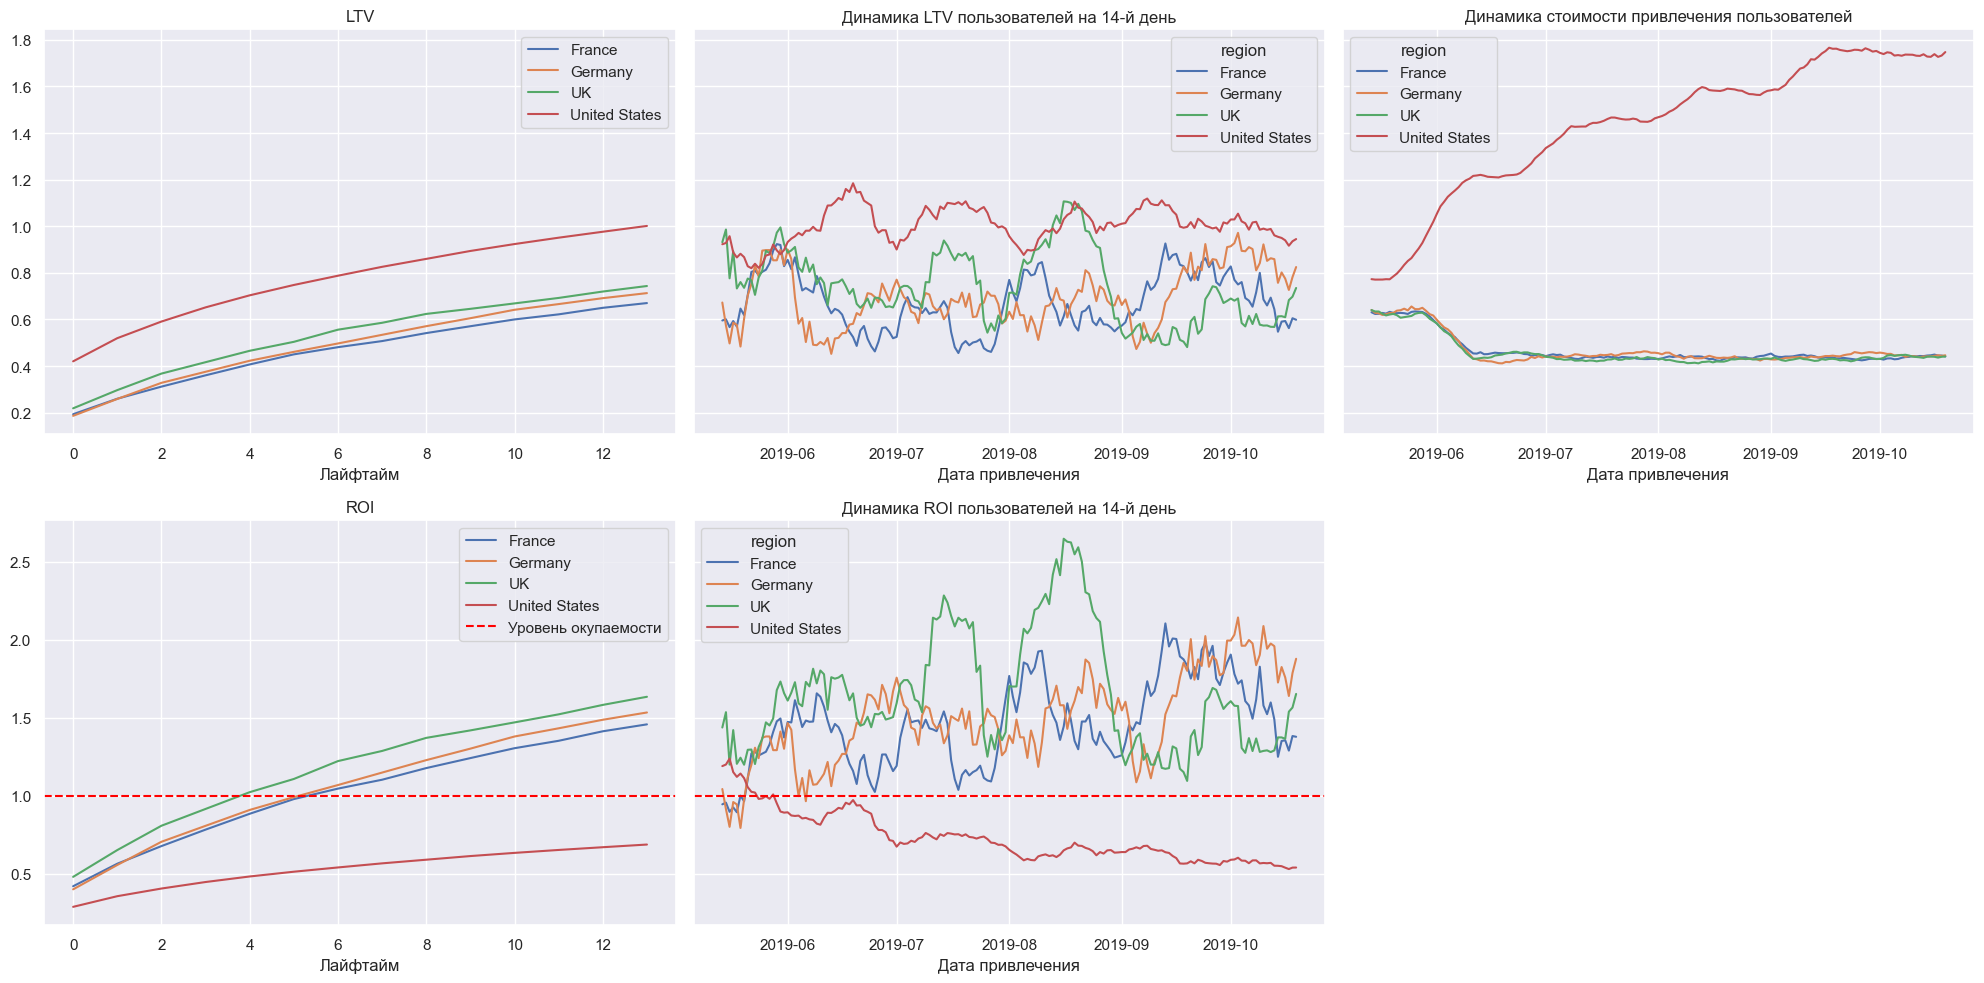

In [57]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_paid, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

На основании полученного результата можно сделать вывод, что расходы на рекламу окупаются во всех странах, кроме США. Причем данный показатель значительно ниже, чем для других стран. Причиной этому может быть слишком высокая стоимость привлечения пользователей при низкой эффективности привлечения.

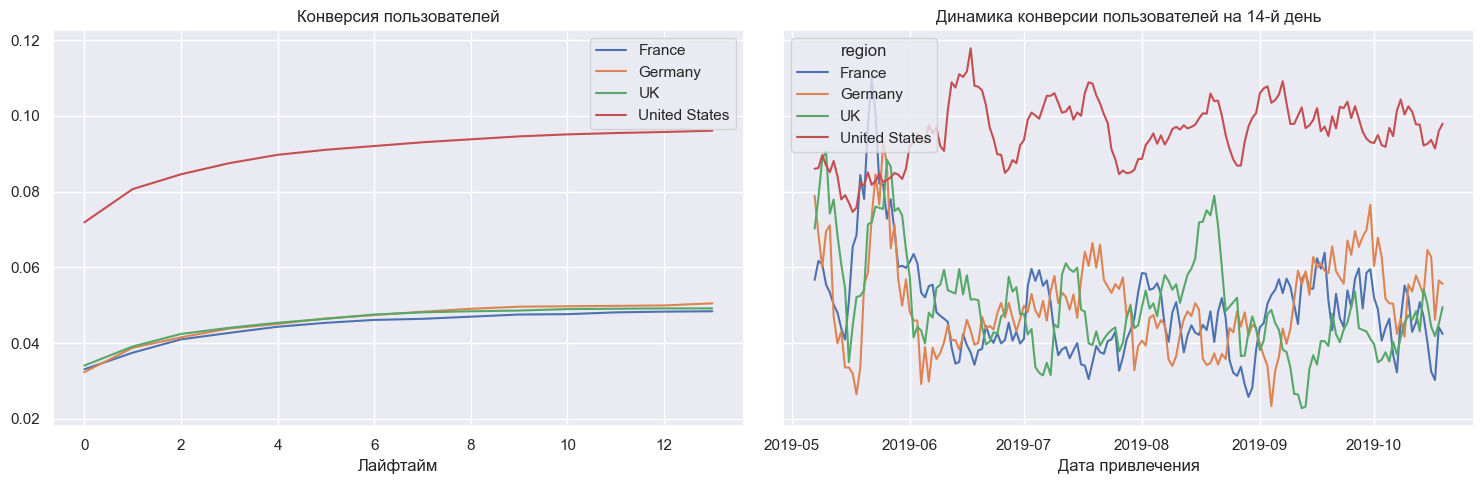

In [58]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_paid, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия США значительно превышает таковую для других стран. Стоит также отметить, что, в целом, динамика изменения данного показателя более стабильна.

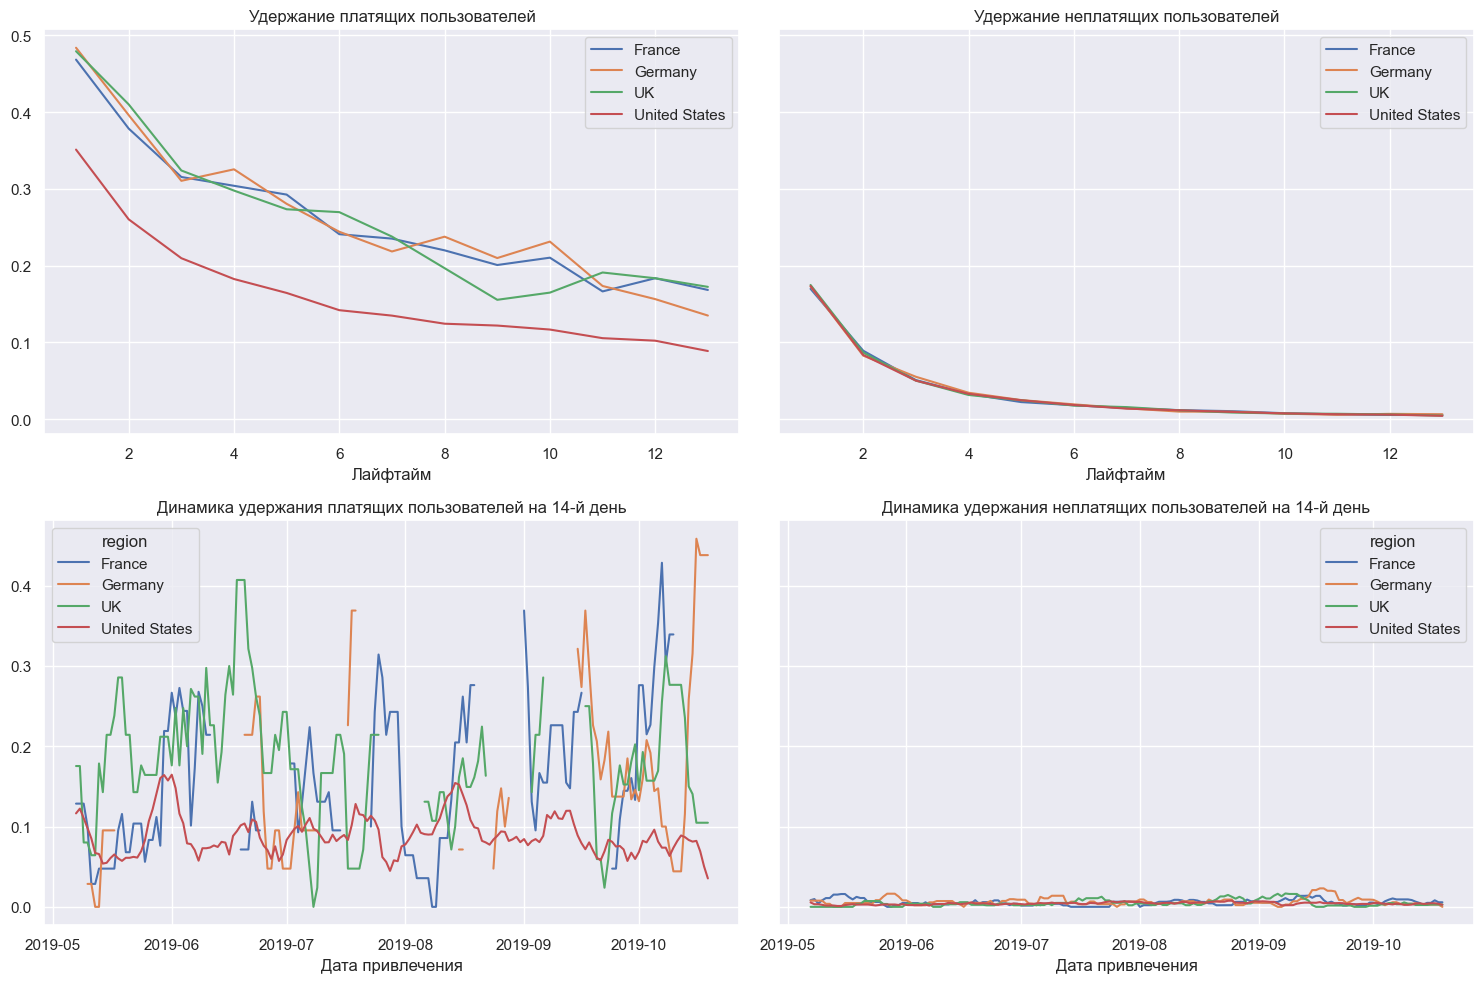

In [59]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_paid, visits[visits['channel'] != 'organic'], observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

С удержанием пользователей обратная ситуация: для США оно стабильно хуже, чем для других стран. Значит, несмотря на высокий показатель конверсии, неокупаимость пользователей из данной страны обусловлена низким удержанием: за счёт значительного, и всё увеличивающегося, финансирования происходит привлечение все большего количества пользователей, которые успешно конвертируются, однако не остаются в долгосрочной преспективе.

#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам

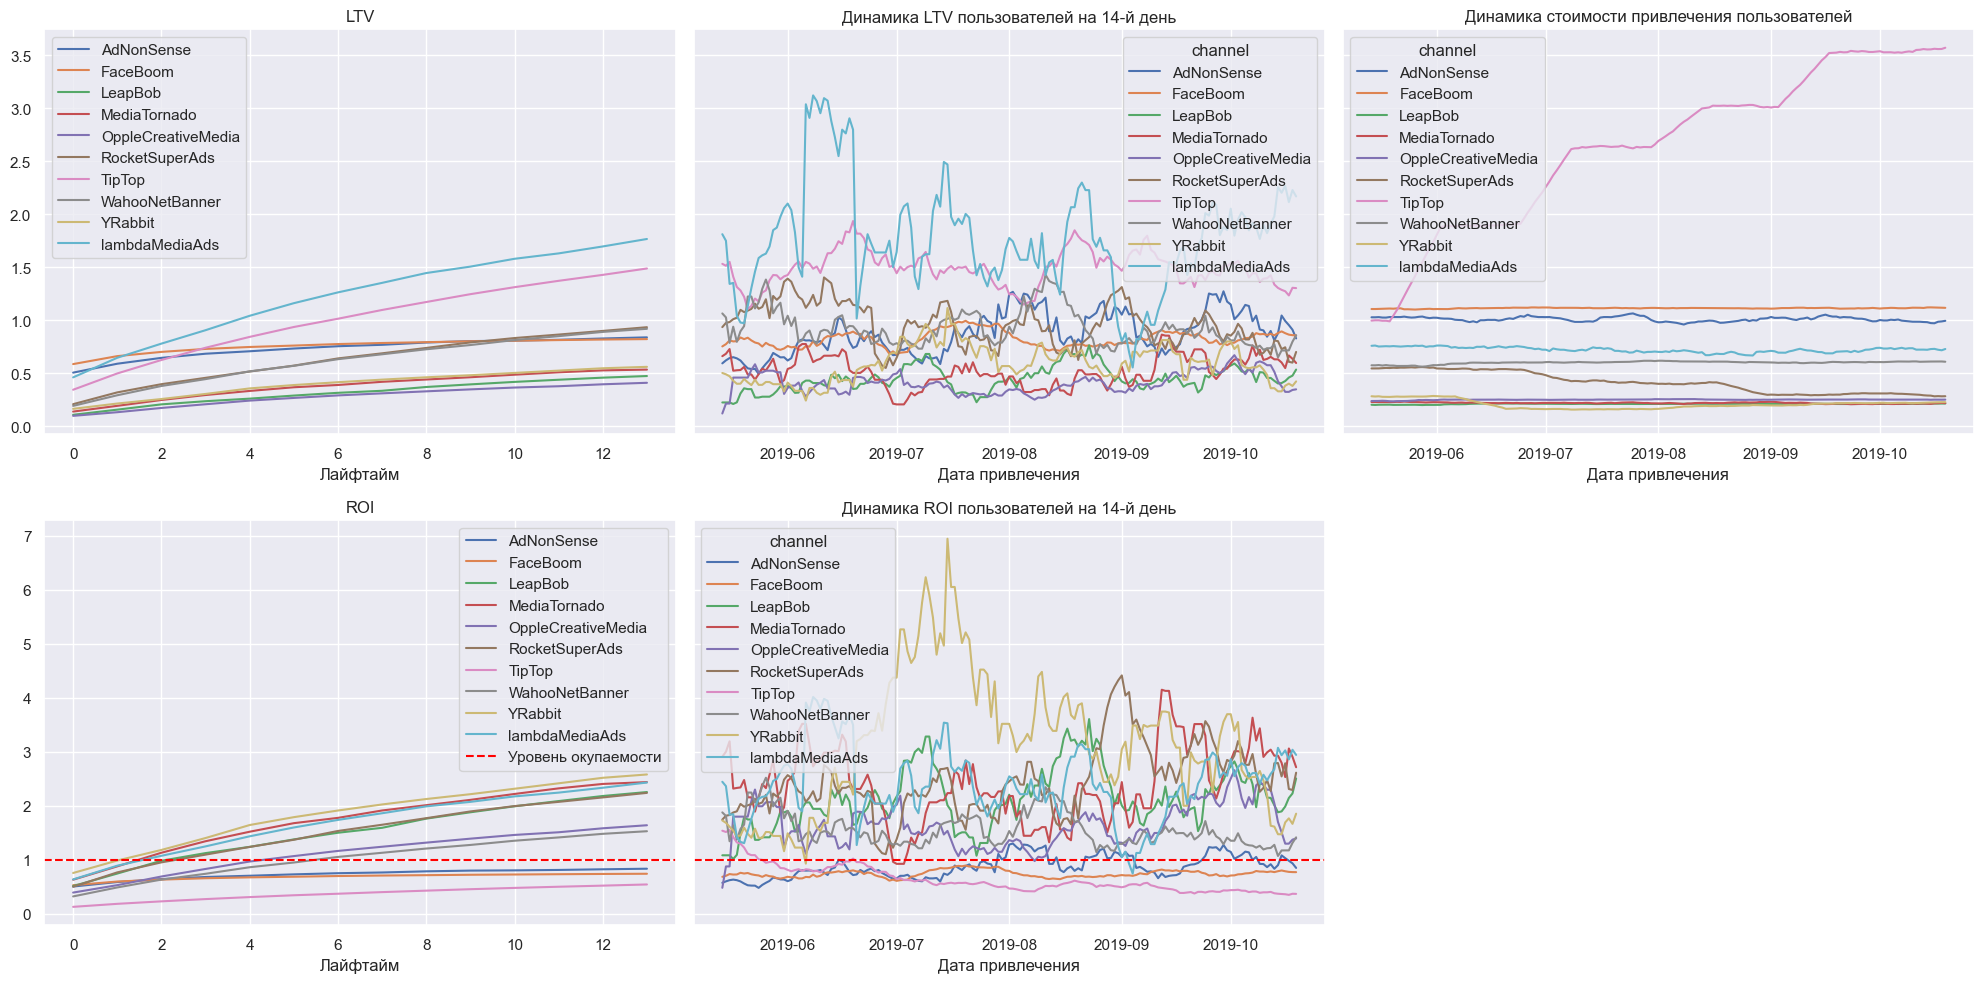

In [60]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_paid, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Поскольку рекламных каналов достаточно большое количество, в певую очередь стоит обратить внимание на наиболее финансируемые - 'TipTop' и 'FaceBoom', что мы выяснили ранее. Стоит отметить, что у наиболее крупного по количеству привлечённых пользователей и объёму финансирования канала - 'TipTop', наиболее низкий процент окупаемости. Это видно из значимо большего показателя стоимости привлечения пользователей, а также его постоянном росте в течение изучаемого периода.

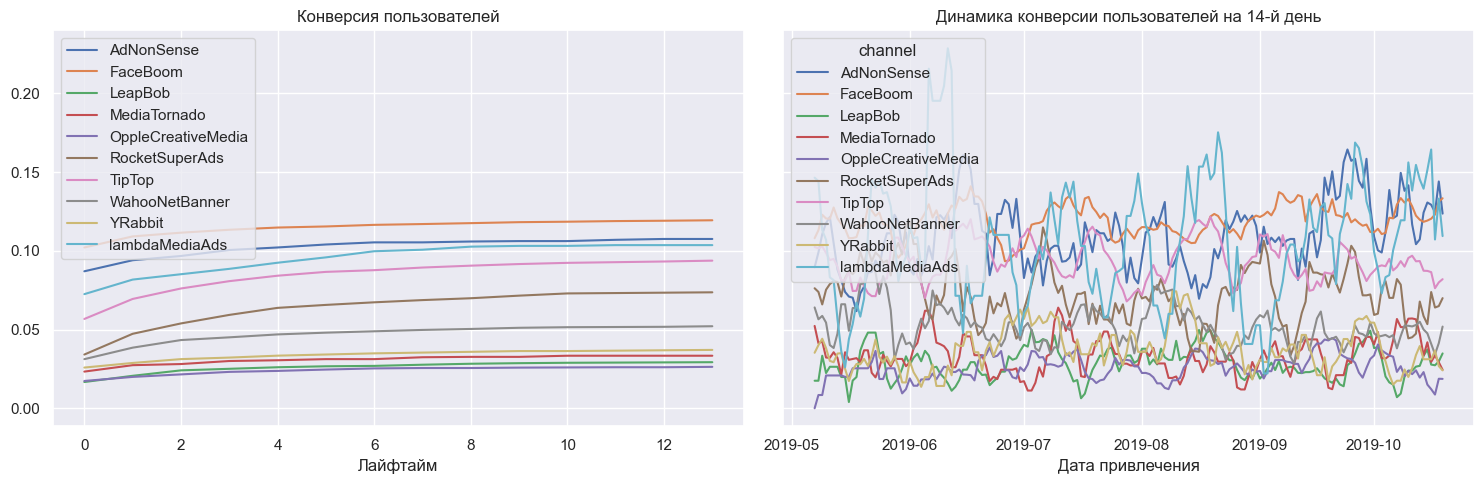

In [61]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_paid, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Как видно из графиков, наибольшая конверсия у канала 'FaceBoom', который также является вторым по количеству привлечённых пользователей. В то же время, у наиболее крупного по количеству привлечённых пользователей и объёму финансирования канала - 'TipTop' средний показатель конверсии.

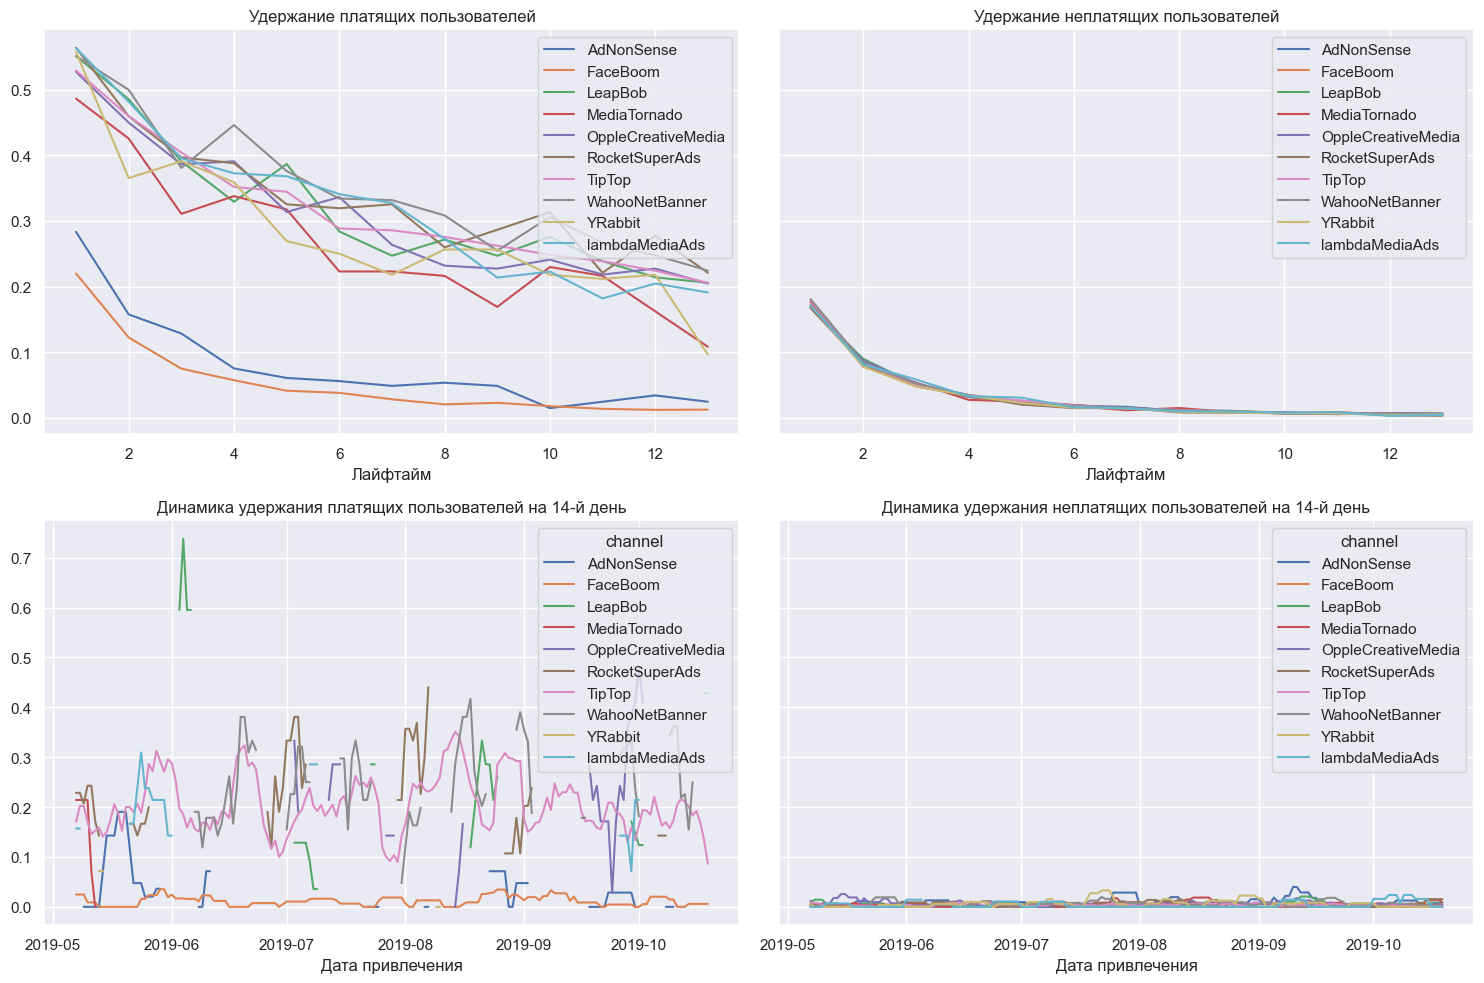

In [62]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_paid, visits[visits['channel'] != 'organic'], observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Снова обратим внимание на два наиболее крупных канала: 'TipTop' и 'FaceBoom'. Видим, что у последнего самый низкий показатель удержания среди других каналов. Возможно, именно этим обусловлена его неокупаемость. Неокупаемость же канала 'TipTop' может быть объяснена постоянным повышением стоимости привлечения пользователей.

#### Вывод по разделу

Таким образом, можно сделать следующие выводы в результате проведённого анализа:
- Реклама не окупается: спустя 2 недели показатель едва достигает 80%;
- Удержание как платящих, так и не платящих пользователей не особо хорошо и составляет всего примерно 10-15%;
- CAC не стабилен. Значит, рекламный бюджет увеличивается, что также было выяснено ранее;
- LTV достаточно стабилен. Значит, дело не в ухудшении качества пользователей;
- Негативное влияние на окупаемость рекламы оказывают владельцы 'IPhone' и 'Mac','Android' - окупаются только владельцы 'PC', а также пользователи из США;
- Необходимо также рассмотреть рекламный канал 'TipTop', поскольку несмотря на в несколько раз большее финансирование по сравнению с другими каналами привлечение пользователей через него не окупается, а стоимость привлечения постоянно растёт. Второй по количеству привлечённых пользователей канал 'FaceBoom' также не окупается, это, скорее всего, обусловлено низким показателем удержания.

### Вывод

<p><b>Изучив полученные данные, можно сформировать следующие выводы:</b></p>

Данные качественные, без пропусков и дубликатов. Изучаемый период - с 1 мая 2019г. по 27 октября 2019г. - всего за 179 дней;

Относительно спектра стран, из которых привлекаются пользователи:
- Большинство пользователей приходит из США (около 100 000 чел.), в то время как из остальных стран - более, чем в 5 раз меньше;

- Абсолютное большинство платящих пользователей также из США;

- Доля платящих пользователей в общем числе также наибольшая для США: около 7% новых пользователей конвертируются в покупателей. Для других стран данный показатель составляет около 4%, что почти в 2 раза меньше.

Относительно устройств, используемых привлечёнными пользователями:
- Большинство пользователей совершают свои действия с устройств типа 'IPhone'(около 100 000 чел.), в то время как с остальных устройств - примерно в 2 раза меньше;

- Абсолютное большинство платящих пользователей также являются владельцами устройств типа 'IPhone';

- Несмотря на значительно большее количество платящих пользователей-владельцев 'IPhone', процент пользователей, совершивших покупку, примерно одинаков для всех типов устройств и составляет примерно 5-6%.

Относительно каналов привлечения пользователей:
- Большинство пользователей пришли "естественным" путем (около 56-58 тыс.чел), т.е. не через рекламные объявления. Что касается рекламных каналов, то наибольшее количество пользователей было привлечено через 'FaceBoom'(около 30 тыс чел.),а также 'TipTop'(около 20 тыс чел.). Через каждый из других каналов было привлечено менее 10 тыс. пользователей.;

- Абсолютное большинство платящих пользователей также привлекаются через канал 'FaceBoom'(около 3,5 тыс чел.) и 'TipTop'(около 2 тыс чел.), через другие же каналы приходит примерно в 3-4 раза меньше платящих пользователей;

- Наиболее эффективным со стороны доли платящих пользователей среди привлечённых оказался 'FaceBoom'(около 12%), а также 'AdNonSense'(около 11%), хотя другие каналы также не особо уступают в эффективности привлечения платящих пользователей, за исключением нескольких.
<p> </p>
<p>___________________________________________________________________________________________________________________________</p>
<p><b>На основании анализа маркетинга также можно сделать вывод, что:</p></b>
<p> </p>
- Объем финансирования менялся понедельно только для каналов с наибольшим количеством привлекаемых пользователей: 'TipTop' и 'FaceBoom'. На остальные каналы тратились примерно одинаковые суммы в течение всего изучаемого периода.
- Затраты на два основных рекламных канала: 'TipTop' и 'FaceBoom' растут в течение изучаемого периода времени, в то время как финансирование остальных каналов остаётся примерно на одном уровне.
- Для большинства рекламных каналов стоимость привлечения пользователей остаётся практически неизменной, за исключением канала 'TipTop', для которого она постоянно повышается, эффективность данного канала в течение изучаемого периода постоянно снижается.
<p>___________________________________________________________________________________________________________________________</p>
<p><b>Что касается окупаемости рекламы:</p></b>
<p> </p>
- Реклама не окупается: спустя 2 недели показатель достигает 80%;
- Удержание как платящих, так и не платящих пользователей не особо хорошо и составляет всего примерно 10-15%;
- CAC не стабилен. Значит, рекламный бюджет увеличивается, что также было выяснено ранее;
- LTV достаточно стабилен. Значит, дело не в ухудшении качества пользователей;
- Негативное влияние на окупаемость рекламы оказывают владельцы 'IPhone' и 'Mac','Android' - окупаются только владельцы 'PC', а также пользователи из США;
- Необходимо также рассмотреть рекламный канал 'TipTop', поскольку несмотря на в несколько раз большее финансирование по сравнению с другими каналами привлечение пользователей через него не окупается, а стоимость привлечения постоянно растёт.Второй по количеству привлечённых пользователей канал 'FaceBoom' также не окупается, это, скорее всего, обусловлено низким показателем удержания.

<p> </p>
<p>___________________________________________________________________________________________________________________________</p>
<p> </p>
<b>Суммируя вышесказанное, стоит отметить, что необходимо пересмотреть политику в отношении рекламного источника 'TipTop', а также 'FaceBoom', которые, несмотря на наибольшее количество привлечённых пользователей, не окупаются. При этом продолжается всё большее финансирование рекламного канала 'TipTop', что также необходимо скорректировать. Есть и другие каналы, не окупающиеся за заданный период, однако объемы финансирования и привлечённых польхователей у них в несколько раз меньше. Возможно, необходимо также пересмотреть политику привлечения пользователей из США, поскольку это единственная страна, привлечение пользователей из которой не окупается, при продолжающемся увеличении стоимости привлекаемых пользователей.</b>